<a href="https://colab.research.google.com/github/Bouka12/Resampling-Methods-for-Imbalanced-Data-Classification/blob/main/Resampling_methods_Random_Over_Under_Hybrid_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("haberman.csv.csv",header=None)

In [5]:
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [15]:
df["y"].unique()

array([1, 2])

In [9]:
df = df.rename(columns={0:"f1", 1:"f2", 2:"f3", 3:"y"})

In [10]:
df.columns

Index(['f1', 'f2', 'f3', 'y'], dtype='object')

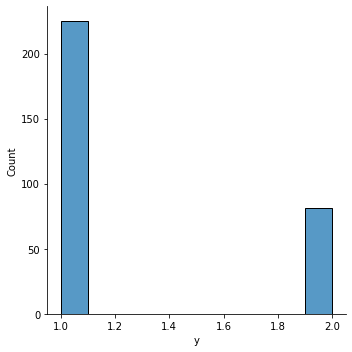

In [14]:
sns.displot(df, x="y")

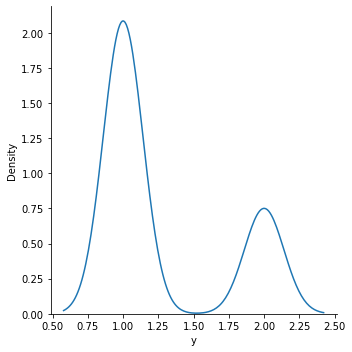

In [16]:
sns.displot(df, x="y",kind="kde")

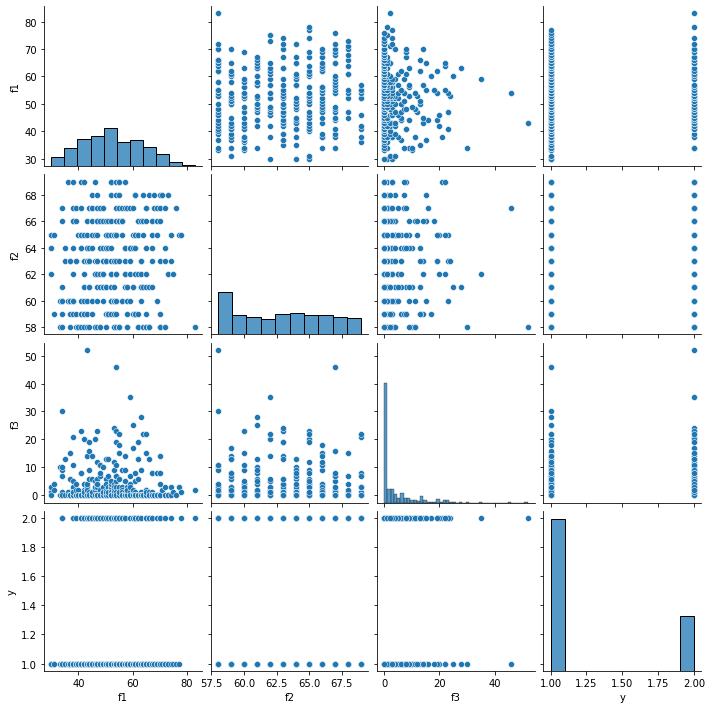

In [23]:
sns.pairplot(df)

In [30]:
df["y"].value_counts()

1    225
2     81
Name: y, dtype: int64

# **Train Test Split**

In [32]:
y=df['y'].copy()
x=df.drop('y',axis=1)

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42,stratify=y, shuffle=True)

# **1.Random OverSampling ROS**





In [45]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print('Initial training dataset shape %s' % Counter(y))
orus = RandomOverSampler(random_state=42, sampling_strategy=1)
x_ores, y_ores = orus.fit_resample(x, y)
print('Balanced training dataset with RUS shape %s' % Counter(y_ores))

Initial training dataset shape Counter({1: 225, 2: 81})
Balanced training dataset with RUS shape Counter({1: 225, 2: 225})


### **Training a Random Forest on the data balanced with random oversampling**






In [46]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=2)
RF.fit(x_ores,y_ores)

y_pred=RF.predict(x_test)

### **Model evaluation**


In [66]:
#Import scikit-learn metrics module for model evaluation
from sklearn import metrics
# Classification based metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("recall:",metrics.recall_score(y_test, y_pred,pos_label=2))
print("roc AUC:",metrics.roc_auc_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.9516129032258065
recall: 0.875
roc AUC: 0.9266304347826088
F1-score: 0.967741935483871


In [49]:
from sklearn.metrics import confusion_matrix
cm0=confusion_matrix(y_test, y_pred)

array([[45,  1],
       [ 2, 14]])

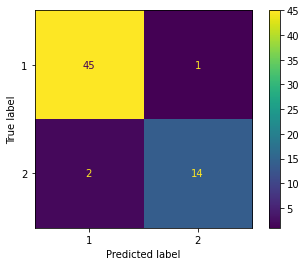

In [67]:
cm0 = confusion_matrix(y_test, y_pred, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm0, display_labels=RF.classes_)
disp.plot()
plt.show()

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.98      0.97        46
           2       0.93      0.88      0.90        16

    accuracy                           0.95        62
   macro avg       0.95      0.93      0.94        62
weighted avg       0.95      0.95      0.95        62



# **2.Random UnderSampling ROS**

In [54]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
print('Initial training dataset shape %s' % Counter(y))
rus = RandomUnderSampler(random_state=42,replacement=False, sampling_strategy=1)
x_res, y_res = rus.fit_resample(x, y)
print('Balanced training dataset with RUS shape %s' % Counter(y_res))


Initial training dataset shape Counter({1: 225, 2: 81})
Balanced training dataset with RUS shape Counter({1: 81, 2: 81})


[Text(0.5, 1.0, 'Original data')]

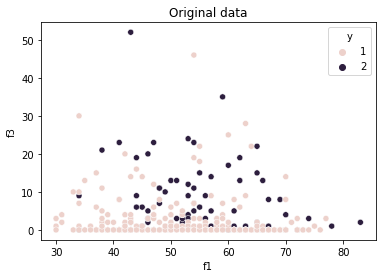

In [84]:
sns.scatterplot(y=x['f3'],x=x['f1'],hue=y).set(title="Original data")

[Text(0.5, 1.0, 'Undersampled data')]

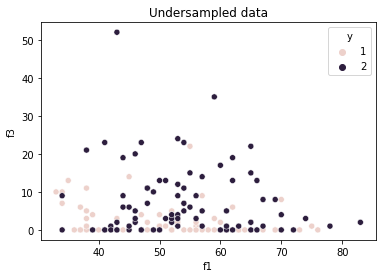

In [87]:
sns.scatterplot(y=x_res['f3'],x=x_res['f1'],hue=y_res).set(title="Undersampled data")

[Text(0.5, 1.0, 'Oversampled data')]

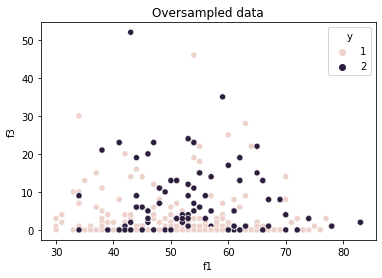

In [88]:
sns.scatterplot(y=x_ores['f3'],x=x_ores['f1'],hue=y_ores).set(title="Oversampled data")

[Text(0.5, 1.0, 'Data with Hybrid random sampling')]

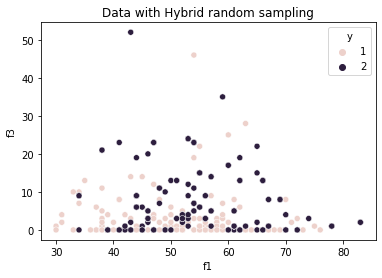

In [89]:
sns.scatterplot(y=x_hres['f3'],x=x_hres['f1'],hue=y_hres).set(title="Data with Hybrid random sampling")

In [55]:
from sklearn.ensemble import RandomForestClassifier
RF1=RandomForestClassifier(random_state=2)
RF1.fit(x_res,y_res)

y_pred1=RF1.predict(x_test)

In [65]:
#Import scikit-learn metrics module 
from sklearn import metrics
# Model evaluation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("recall:",metrics.recall_score(y_test, y_pred1,pos_label=2))
print("roc AUC:",metrics.roc_auc_score(y_test, y_pred1))
print("F1-score:",metrics.f1_score(y_test, y_pred1))

Accuracy: 0.6935483870967742
recall: 0.9375
roc AUC: 0.7730978260869565
F1-score: 0.7466666666666666


In [60]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix(y_test, y_pred1)

array([[28, 18],
       [ 1, 15]])

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           1       0.97      0.61      0.75        46
           2       0.45      0.94      0.61        16

    accuracy                           0.69        62
   macro avg       0.71      0.77      0.68        62
weighted avg       0.83      0.69      0.71        62



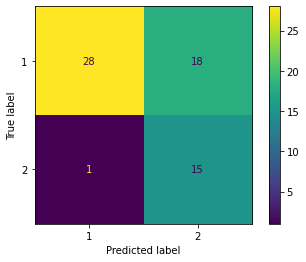

In [63]:
cm=confusion_matrix(y_test, y_pred1)
cm = confusion_matrix(y_test, y_pred1, labels=RF1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF1.classes_)
disp.plot()
plt.show()

# **Hyprid Random Sampling**

In [68]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
print('Initial training dataset shape %s' % Counter(y))
rush = RandomUnderSampler(random_state=42,replacement=False, sampling_strategy=0.5)
x_rush, y_rush = rush.fit_resample(x, y)
print('Balanced training dataset with RUSH shape %s' % Counter(y_rush))

Initial training dataset shape Counter({1: 225, 2: 81})
Balanced training dataset with RUSH shape Counter({1: 162, 2: 81})


In [69]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print('Initial training dataset shape %s' % Counter(y))
rosh = RandomOverSampler(random_state=42, sampling_strategy=1)
x_hres, y_hres = rosh.fit_resample(x_rush, y_rush)
print('Balanced training dataset with ROSH shape %s' % Counter(y_hres))

Initial training dataset shape Counter({1: 225, 2: 81})
Balanced training dataset with ROSH shape Counter({1: 162, 2: 162})


In [70]:
from sklearn.ensemble import RandomForestClassifier
RFh=RandomForestClassifier(random_state=2)
RFh.fit(x_hres,y_hres)

y_predh=RFh.predict(x_test)

In [71]:
#Import scikit-learn metrics module 
from sklearn import metrics
# Model Evaluation
print("Accuracy:",metrics.accuracy_score(y_test, y_predh))
print("recall:",metrics.recall_score(y_test, y_predh,pos_label=2))
print("roc AUC:",metrics.roc_auc_score(y_test, y_predh))
print("F1-score:",metrics.f1_score(y_test, y_predh))

Accuracy: 0.7580645161290323
recall: 0.9375
roc AUC: 0.8165760869565217
F1-score: 0.810126582278481


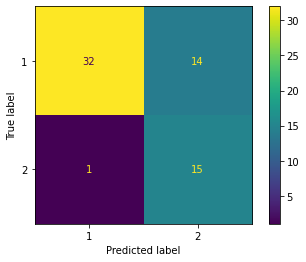

In [72]:
cm2=confusion_matrix(y_test, y_predh)
cm2 = confusion_matrix(y_test, y_predh, labels=RFh.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=RFh.classes_)
disp.plot()
plt.show()